# Testes de associação

Os testes de associação de frequencia servem para a validação de dados de contagem, observando-se se há probabilidade de associação entre k > ou = a 2 categorias. 

Três proveitos podem ser tirados (Kirk 2008): 1) a qualidade do ajuste entre categorias internas das variáveis; 2) a independência entre categorias internas das variáveis; 3) igualdade e homogeneidade das proporções de categorias entre duas variáveis. 

### 1. Estrutura dos testes de hipótese:

H0: =

supondo-se aleatoriedade, quando o teste é internamente efetuado em uma variável/amostra (e menos gl), aceita-se H0 quando as categorias estão ajustadas, quando elas tem aproximada probabilidade de ocorrência e não demonstram independência; quando + variáveis/amostras (e + gl, por consequencia), significa que há aproximada probabilidade de igualdade de proproções (quando variáveis bicategóricas) ou de homogeneidade de proporções (quando multicategórica).



H1: ≠ 

supondo-se aleatoriedade, quando o teste é internamente efetuado em uma variável/amostra (e menos gl), aceita-se H1 quando as categorias não estão ajustadas, quando elas não tem aproximada probabilidade de ocorrência e demonstram independência; quando variáveis/amostras (e + gl, por consequencia), significa que não há aproximada probabilidade de igualdade de proproções (quando variáveis bicategóricas) ou de homogeneidade de proporções (quando multicategórica).



IMPORTANTE: Olhar para a TABELA DE CONTINGÊNCIA (as relações entre AS COLUNAS, o que é calculado de fato) para verificar se há = ou ≠ e pensar nas hipóteses.

### 2. Teste exato de Fisher

Teste adequado para análises em tabelas 2x2, com duas variáveis com categorias binárias e número de resultados < 30. Exemplo do processo de análise na tabela:

In [10]:
tabela_de_fisher <- data.frame(c("A", "C", "A + C"), c("B", "D", "B + D"), c("A + B", "C + D", "A + B + C + D"))

tabela_de_fisher

c..A....C....A...C..,c..B....D....B...D..,c..A...B....C...D....A...B...C...D..
A,B,A + B
C,D,C + D
A + C,B + D,A + B + C + D


Exemplo de análise com dados 2x2 (elaboração rápida de simulação baseada no banco de dados da Roberta):

In [35]:
#Simulação de orientação de voto de um partido (SIM/NÃO) e voto do parlamentar individualizado (SIM/NÃO) em um conjunto de 28 votações 
# (H0: possuem probabilidade de igualdade de proporções?)

# Associadas com similar probabilidade de ocorrência:
simul_parti_deput <- data.frame("orientação" <- c(20, 8), "voto" <- c(20, 8)) 
simul_parti_deput
fisher.test(simul_parti_deput)



X.orientação.....c.20..8.,X.voto.....c.20..8.
20,20
8,8



	Fisher's Exact Test for Count Data

data:  simul_parti_deput
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2670199 3.7450387
sample estimates:
odds ratio 
         1 


In [65]:
# Sem associação:
simul_parti_deput <- data.frame("orientação" <- c(20, 8), "voto" <- c(10, 16)) 
simul_parti_deput
fisher.test(simul_parti_deput)


X.orientação.....c.20..8.,X.voto.....c.10..16.
20,10
8,16



	Fisher's Exact Test for Count Data

data:  simul_parti_deput
p-value = 0.02746
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.122006 14.643502
sample estimates:
odds ratio 
  3.890836 


### 3. Teste Qui-Quadrado 

Teste adequado para análises em tabelas > 2x2, com duas variáveis com categorias binárias ou mais (até 30) e número de resultados > 30 (com número de resultados menor do que 10 aproxima-se no teste exato de Fisher e precisa de correção de Yates, presente na base do R). A base da estatística é 1) soma das amostras/variáveis(ou categorias que "viraram variáveis" e 2) o somatório de 2.1) subtração de valores observados por esperados que é dividido por 2.2) valores esperados. 

[1] 1.01733882 0.42848969 4.80528328 0.21999171 0.04664241 1.04685928
 [7] 3.29600592 0.64453787 0.27132627 0.33970759 1.31008861 1.41350438
[13] 1.22441347 2.36020129 0.92647402

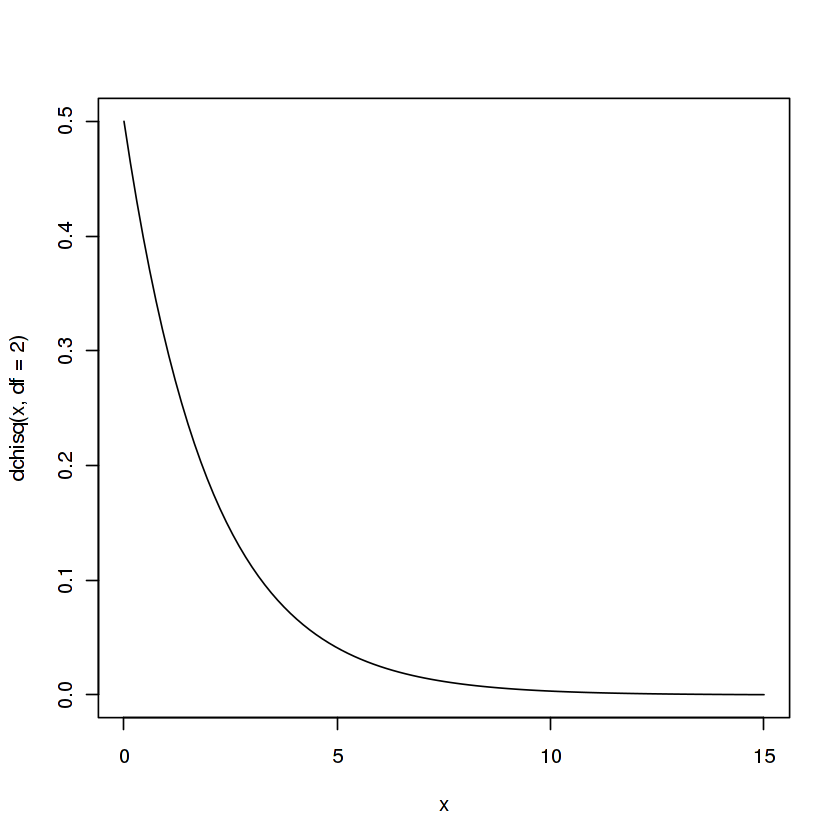

In [66]:
# distribuição qui-quad de números aleatórios (de 0 a 20) e graus de liberdade = 2 (mostrar o q acontece quando infla os GL/DF)

rchisq(15, 2)

curve(dchisq(x, df = 2), from = 0, to = 15)

In [58]:
#"BANQUINHO"
library(tidyverse)
df_parti_deput <- read_csv("Aula5_votos_e_orientacoes.csv")
df_parti_deput

Parsed with column specification:
cols(
  idVotacao_origem = col_character(),
  voto_dep1 = col_character(),
  voto_dep2 = col_character(),
  orientacao_part1 = col_character(),
  orientacao_part2 = col_character()
)


idVotacao_origem,voto_dep1,voto_dep2,orientacao_part1,orientacao_part2
2192459-668,Sim,Sim,Sim,Sim
2192459-696,Sim,Sim,Sim,Sim
2192459-734,Sim,Sim,Sim,Sim
2192459-810,Sim,Sim,Sim,Sim
2192459-640,Sim,Sim,Nao,Sim
2192459-692,Sim,Sim,Nao,Sim
2192459-763,Sim,Sim,Sim,Obstrucao
2192459-619,Sim,Nao,Nao,Obstrucao
2192459-601,Sim,Sim,Sim,Nao
2192459-636,Sim,Sim,Sim,Nao


Visualização da disposição das categorias:

In [59]:
cont_tab <- table(df_parti_deput$voto_dep1, df_parti_deput$voto_dep2)
cont_tab 



           
            Nao Sim
  Abstencao   1   0
  Nao        15   4
  Sim         1  15

Teste Qui-Quadrado (intepretar e modificar):

In [60]:
chisq.test(df_parti_deput$voto_dep1, df_parti_deput$voto_dep2, correct=TRUE)

Warning message in chisq.test(df_parti_deput$voto_dep1, df_parti_deput$voto_dep2, :
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  df_parti_deput$voto_dep1 and df_parti_deput$voto_dep2
X-squared = 19.568, df = 2, p-value = 5.635e-05
